In [68]:
# Generate train as well as test csv files after cleansing of the data by framingham university for relations between colestrol and hear disease 
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # To suppress a warning 
from sklearn.model_selection import train_test_split
data=pd.read_csv("framingham.csv")
print("Shape of data set")
print(data.shape)
train,test = train_test_split(data,test_size=0.2,shuffle=True,random_state=1)  # splitting the data with shuffling at  shuffling or dropping indexes are not reseted accordingly   and setting random_state so that after shuffling any time data split is same 
print("Nan values in train data \n {}".format(train.isna().sum()))
print("---------------------------------------------------------")
print("Nan values in test data \n {}".format(test.isna().sum()))

train=train.dropna(axis=0, how='any')
print("Now nan values in train are")
print(train.isna().sum().sum())
train.insert(0,'ones',1)    # inserting 1 at first column for our vectorised implementation 
train=train.to_csv("training_data.csv",index=False)

test.dropna(axis=0, how='any', inplace=True)   # removing rows (axis = 0)
print("Now nan values in test are")
print(test.isna().sum().sum())
test.insert(0,'ones',1)
test=test.to_csv("testing_data.csv",index=False)

def normalize(df):
    result = df.copy()
    for column in df.columns:
        max_value = df[column].max()
        min_value = df[column].min()
        if(max_value-min_value!=0):
            result[column] = (df[column] - min_value) / (max_value - min_value) 
        else:
            result[column]=df[column]
    return(result) 


normalised_train=normalize(pd.read_csv("training_data.csv"))
normalised_test=normalize(pd.read_csv("testing_data.csv"))

normalised_test_data=normalised_test.iloc[:,0:16].to_numpy()
test_result=normalised_test.iloc[:,16].to_numpy()
test_result=test_result[:,np.newaxis] 
print(test_result.shape)  



normalised_train_data=normalised_train.iloc[:,0:16]

train_result=normalised_train.iloc[:,16].to_numpy()
train_result=train_result[:,np.newaxis]             ### VERY VERYVERY IMPORTANT ALWAYS CONVERT YOUT VECTOR TO A  MATRIX FOR SURE





Shape of data set
(4238, 16)
Nan values in train data 
 male                 0
age                  0
education           86
currentSmoker        0
cigsPerDay          27
BPMeds              41
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             41
sysBP                0
diaBP                0
BMI                 16
heartRate            1
glucose            315
TenYearCHD           0
dtype: int64
---------------------------------------------------------
Nan values in test data 
 male                0
age                 0
education          19
currentSmoker       0
cigsPerDay          2
BPMeds             12
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             9
sysBP               0
diaBP               0
BMI                 3
heartRate           0
glucose            73
TenYearCHD          0
dtype: int64
Now nan values in train are
0
Now nan values in test are
0
(741, 1)


In [75]:

Losses=[]
AccuracyPercentage=[]
Epoches=[]
class logistic_regression:
      def __init__(self,train,result,test,test_result,epoches,alpha):
         self.train=train    #//  m*n+1
         self.result=result  #//  m*1
         self.test=test
         self.test_result=test_result
         samples,features=train.shape             # features will also contain 1-1-1-1 in them as first  column 
         self.samples=samples
         self.features=features
         self.weights=np.random.rand(features,1)  # n+1*1 # it will contain a single column and number of rows same as number of features
         self.epoches=epoches
         self.alpha=alpha

      def sigmoid(self,x):
           y=1/(1+np.exp(-x) )                       
           return y
      
      
      def predict(self, X):        
        
        z = np.dot(X, self.weights) #m*1
        
        array= np.array([1 if i > 0.5 else 0 for i in self.sigmoid(z)]) # Returning binary result
        array=array[:,np.newaxis]
        return array

      def accuracy(self ,y, y_hat):
        accuracy_per = (np.sum(y == y_hat) / len(y) ) * 100
        return accuracy_per


      def training(self):
        
          for i in range(self.epoches):  # in each epoch weights are updated and new predictions are made on which new error is generated which is then optimised again again with another loop 
              Epoches.append(i)
              predicted_data=np.dot(self.train,self.weights)  
              predicted_probability = self.sigmoid(predicted_data)  #  m*1
              binary_predicted=self.predict(self.train)              # self.weights are cahnging in each loop so our binary prediction will also be cahnging in each loop
              accuracy_percentage=self.accuracy(self.result,binary_predicted)
              AccuracyPercentage.append(accuracy_percentage)
             
                                                            # -1/m *summation(i=1 to m) { y[i] log(h_theta(x[i]) + (1-y[i]) log(1-h_theta[x[i]]))}
                                                            # in logistic regression even if one prediction is not correct then our error will go to nan or infinity 
                                                            # calculating error using matrices only and not applying the loop 
              loss= -1/self.samples * np.sum  ( np.add (np.multiply(self.result, np.log(predicted_probability)), np.multiply(1-self.result, np.log(1-predicted_probability)) ) , axis=0)
              Losses.append(loss)
             # print("IN {} epoch loss is {} and accuracy is {}".format(i,loss,accuracy_percentage))
              weights_subtract= self.alpha/self.samples * np.dot(np.transpose(self.train),np.subtract( predicted_probability,self.result) )
              
              self.weights=np.subtract(self.weights,weights_subtract)
# also testing  could be done in each loop
      def testing(self):
        binary_pre=self.predict(self.test)
        acc_per=self.accuracy(self.test_result,binary_pre)
        print("testing accuracy is  ______________________________")
        print(acc_per)

        
              
a= logistic_regression(train=normalised_train_data,result=train_result,test=normalised_test_data,test_result=test_result,epoches=200,alpha=0.1)

a.training()
print("------------------------After training weights are as following --------------------------------")
print(a.weights)
print("-------------------------------------------------------------------------------------------------")
a.testing()

------------------------After training weights are as following --------------------------------
[[-1.27371196]
 [ 0.02721287]
 [-0.16488872]
 [-0.48410254]
 [-0.44293019]
 [ 0.57686477]
 [ 0.11463366]
 [ 0.79955011]
 [ 0.15015257]
 [ 0.86007185]
 [-0.15593586]
 [ 0.36054173]
 [-0.39210532]
 [ 0.06351996]
 [-0.1156692 ]
 [ 0.47449732]]
-------------------------------------------------------------------------------------------------
testing accuracy is  ______________________________
86.5047233468286


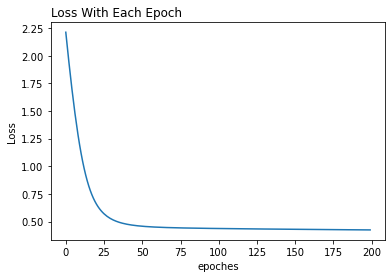

In [76]:
import matplotlib.pyplot as plt


plt.title("Loss With Each Epoch",loc = 'left')
plt.xlabel("epoches")
plt.ylabel("Loss")
plt.scatter(Epoches,Losses)
plt.show()


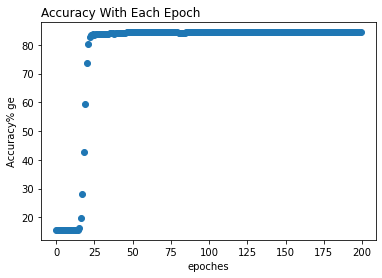

In [78]:
import matplotlib.pyplot as plt


plt.title("Accuracy With Each Epoch",loc = 'left')
plt.xlabel("epoches")
plt.ylabel("Accuracy% ge")
plt.scatter(Epoches,AccuracyPercentage)
plt.show()